# Electric Car Data 

- Data Set = https://www.kaggle.com/datasets/geoffnel/evs-one-electric-vehicle-dataset
- Problem Statements.

        1. What is the distribution of prices for the electric cars in the dataset?        
2. Is there a relationship between the acceleration time (0-100 km/h) and the top speed of electric cars?        
3. How does the range of electric cars vary across different brands        ?
4. What is the relationship between the efficiency (Wh/km) and the range of the electric car        s?
5. How does the price of electric cars relate to their ran        ge?
6. How does the top speed of electric cars vary by body style (e.g., sedan, SUV, hatchba        ck)?
7. How does acceleration performance compare between all-wheel drive and rear-wheel drive electric         cars?
8. Is there a correlation between the fast charging speed (km/h) and the range of the electric         cars?
9. What is the price distribution of electric cars across different market segments (e.g., B,         C, D)?
10. What is the relationship between seating capacity and body style of the electric cars?

I have previewed the data from Excel and found that it needs to be cleaned. Below are the steps that need to be done in the data cleaning process.

1. column - Accel , will remove the sec make it a float data type 
2. column - TopSpeed , will remove the km/h make it a float data type 
3. column - Range , will remove the km make it a float data type 
4. column - Efficiency , will remove the Wh/km make it a float data type 
5. column - FastCharge , will remove the km/h make it a float data type 
6. column - RapidCharge , will make values YES/NO 

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data_car = pd.read_csv('ElectricCarData_Norm.csv')
data_car

,Brand,Model,Accel,TopSpeed,Range,Efficiency,FastCharge,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6 sec,233 km/h,450 km,161 Wh/km,940 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0 sec,160 km/h,270 km,167 Wh/km,250 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7 sec,210 km/h,400 km,181 Wh/km,620 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8 sec,180 km/h,360 km,206 Wh/km,560 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5 sec,145 km/h,170 km,168 Wh/km,190 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,B,4,32997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,Nissan,Ariya 63kWh,7.5 sec,160 km/h,330 km,191 Wh/km,440 km/h,Rapid charging possible,Front Wheel Drive,Type 2 CCS,Hatchback,C,5,45000
99,Audi,e-tron S Sportback 55 quattro,4.5 sec,210 km/h,335 km,258 Wh/km,540 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,SUV,E,5,96050
100,Nissan,Ariya e-4ORCE 63kWh,5.9 sec,200 km/h,325 km,194 Wh/km,440 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,Hatchback,C,5,50000
101,Nissan,Ariya e-4ORCE 87kWh Performance,5.1 sec,200 km/h,375 km,232 Wh/km,450 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,Hatchback,C,5,65000


In [3]:
data_car['Accel'] = data_car['Accel'].str.split(' ').str.get(0)

In [4]:
data_car['Accel'] = data_car['Accel'].astype(float)

In [5]:
data_car.rename(columns = {'Accel' : 'acceleration (seconds)' }, inplace=True)

In [6]:
data_car['TopSpeed'] = data_car['TopSpeed'].str.split(' ').str.get(0)

In [7]:
data_car['TopSpeed'] = data_car['TopSpeed'].astype(float)

In [8]:
data_car.rename(columns = {'TopSpeed' : 'TopSpeed (Km/h)' }, inplace=True)

In [9]:
data_car['Range'] = data_car['Range'].str.split(' ').str.get(0)

In [10]:
data_car['Range'] = data_car['Range'].astype(float)

In [11]:
data_car.rename(columns = {'Range' : 'Range (Km)' }, inplace=True)

In [12]:
data_car['Efficiency'] = data_car['Efficiency'].str.split(' ').str.get(0)

In [13]:
data_car['Efficiency'] = data_car['Efficiency'].astype(float)

In [14]:
data_car.rename(columns = {'Efficiency' : 'Efficiency (Wh/km)' }, inplace=True)

In [15]:
data_car['FastCharge'] = data_car['FastCharge'].str.split(' ').str.get(0)

In [18]:
data_car['FastCharge'] = data_car['FastCharge'].replace('-', 'NaN')

In [19]:
data_car['FastCharge'] = data_car['FastCharge'].astype(float)

In [20]:
data_car.rename(columns = {'FastCharge' : 'FastCharge (km/h)' }, inplace=True)

In [21]:
rapid_charge_index = data_car['RapidCharge'][data_car['RapidCharge'].str.contains('not') ] .index

In [22]:
rapid_charge_index

Index([57, 68, 77, 82, 91], dtype='int64')

In [23]:
rapid_charge_index = data_car['RapidCharge'][data_car['RapidCharge'].str.contains('not') ] .index

In [24]:
rapid_charge_values = data_car['RapidCharge'][data_car['RapidCharge'].str.contains('not') ] .values

In [25]:
rapid_charge_values

array(['Rapid charging not possible', 'Rapid charging not possible',
       'Rapid charging not possible', 'Rapid charging not possible',
       'Rapid charging not possible'], dtype=object)

In [30]:
data_car.loc[rapid_charge_index , 'RapidCharge'] = '0'

In [31]:
r_c_index = data_car['RapidCharge'][data_car['RapidCharge'].str.contains('Rapid') ].index
r_c_index

Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
        28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
        42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
        56,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  69,  70,  71,
        72,  73,  74,  75,  76,  78,  79,  80,  81,  83,  84,  85,  86,  87,
        88,  89,  90,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102],
      dtype='int64')

In [32]:
data_car.loc[r_c_index, 'RapidCharge']='1'

In [33]:
data_car['RapidCharge'] = data_car['RapidCharge'].astype(int)

In [86]:
data_car['RapidCharge']

0      1
1      1
2      1
3      1
4      1
      ..
98     1
99     1
100    1
101    1
102    1
Name: RapidCharge, Length: 103, dtype: int32

# Data Has Been cleaned now . 

In [34]:
data_car

,Brand,Model,acceleration (seconds),TopSpeed (Km/h),Range (Km),Efficiency (Wh/km),FastCharge (km/h),RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233.0,450.0,161.0,940.0,1,All Wheel Drive,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160.0,270.0,167.0,250.0,1,Rear Wheel Drive,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210.0,400.0,181.0,620.0,1,All Wheel Drive,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180.0,360.0,206.0,560.0,1,Rear Wheel Drive,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145.0,170.0,168.0,190.0,1,Rear Wheel Drive,Type 2 CCS,Hatchback,B,4,32997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,Nissan,Ariya 63kWh,7.5,160.0,330.0,191.0,440.0,1,Front Wheel Drive,Type 2 CCS,Hatchback,C,5,45000
99,Audi,e-tron S Sportback 55 quattro,4.5,210.0,335.0,258.0,540.0,1,All Wheel Drive,Type 2 CCS,SUV,E,5,96050
100,Nissan,Ariya e-4ORCE 63kWh,5.9,200.0,325.0,194.0,440.0,1,All Wheel Drive,Type 2 CCS,Hatchback,C,5,50000
101,Nissan,Ariya e-4ORCE 87kWh Performance,5.1,200.0,375.0,232.0,450.0,1,All Wheel Drive,Type 2 CCS,Hatchback,C,5,65000


# Problem Statement - 1 

    - What is the distribution of prices for the electric cars in the dataset?

C:\Users\Akash Tyagi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


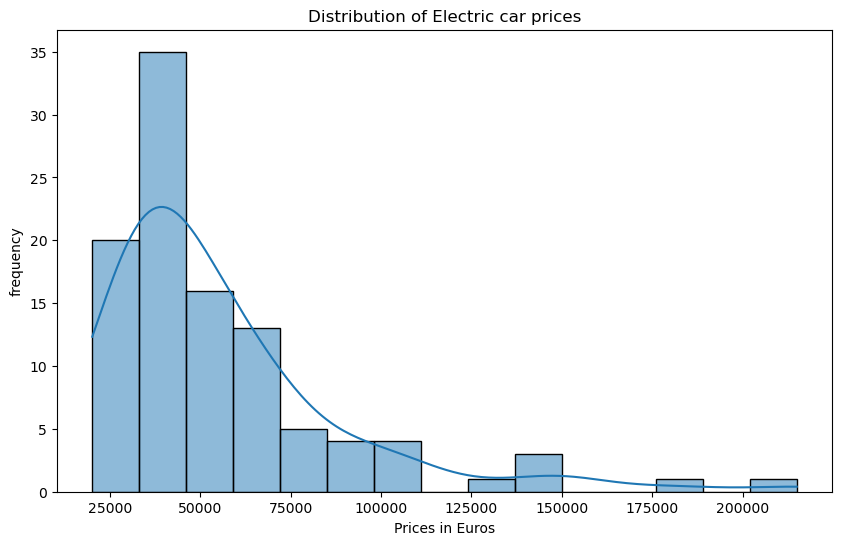

In [35]:
plt.figure(figsize=(10,6))
sns.histplot(data= data_car, x='PriceEuro', kde=True)
plt.title('Distribution of Electric car prices')
plt.xlabel('Prices in Euros')
plt.ylabel('frequency')
plt.show()

# Problem statement 2

    - Is there a relationship between the acceleration time (0-100 km/h) and the top speed of electric cars?

C:\Users\Akash Tyagi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Akash Tyagi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='acceleration (seconds)', ylabel='TopSpeed (Km/h)'>

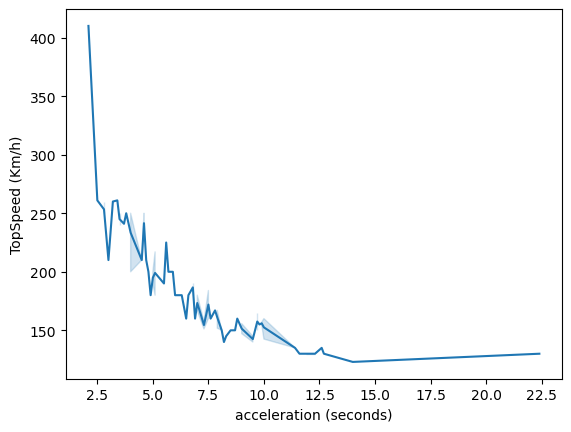

In [36]:
sns.lineplot(data= data_car, x='acceleration (seconds)', y='TopSpeed (Km/h)')

<Axes: xlabel='acceleration (seconds)', ylabel='TopSpeed (Km/h)'>

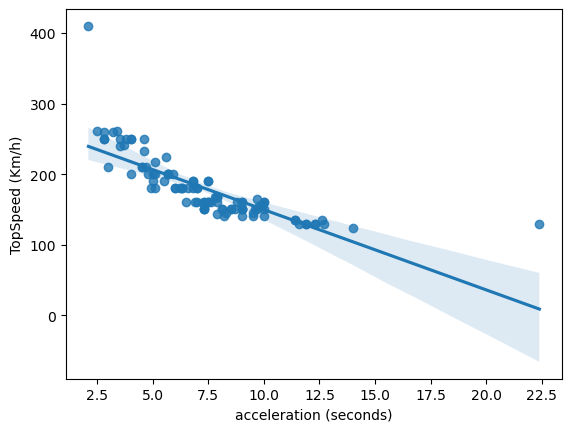

In [152]:
sns.regplot(data= data_car, x='acceleration (seconds)', y='TopSpeed (Km/h)')

# Problem Statement 3

    - How does the range of electric cars vary across different brands?

In [135]:
data_brand_price = data_car.groupby(['Brand'])['Range (Km)'].median().reset_index()
data_brand_price.sort_values(by='Range (Km)')

,Brand,Range (Km)
28,Smart,95.0
9,Honda,170.0
17,Mazda,180.0
19,Mini,185.0
26,SEAT,195.0
16,MG,220.0
29,Sono,225.0
6,DS,250.0
7,Fiat,250.0
5,Citroen,250.0


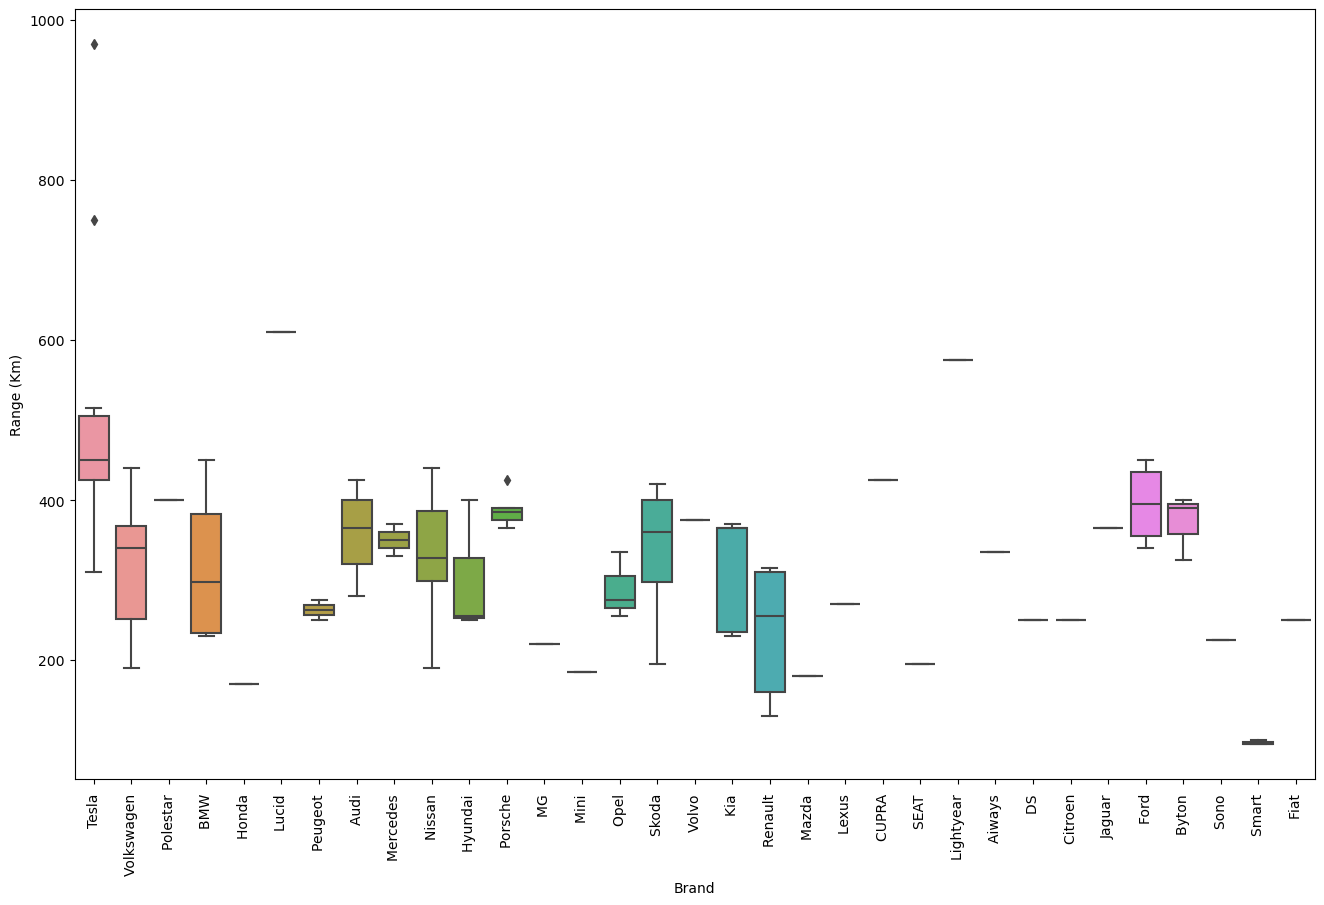

In [136]:
plt.figure(figsize=(16,10))
sns.boxplot(data= data_car, x='Brand', y='Range (Km)')
plt.xticks(rotation=90)
plt.show()

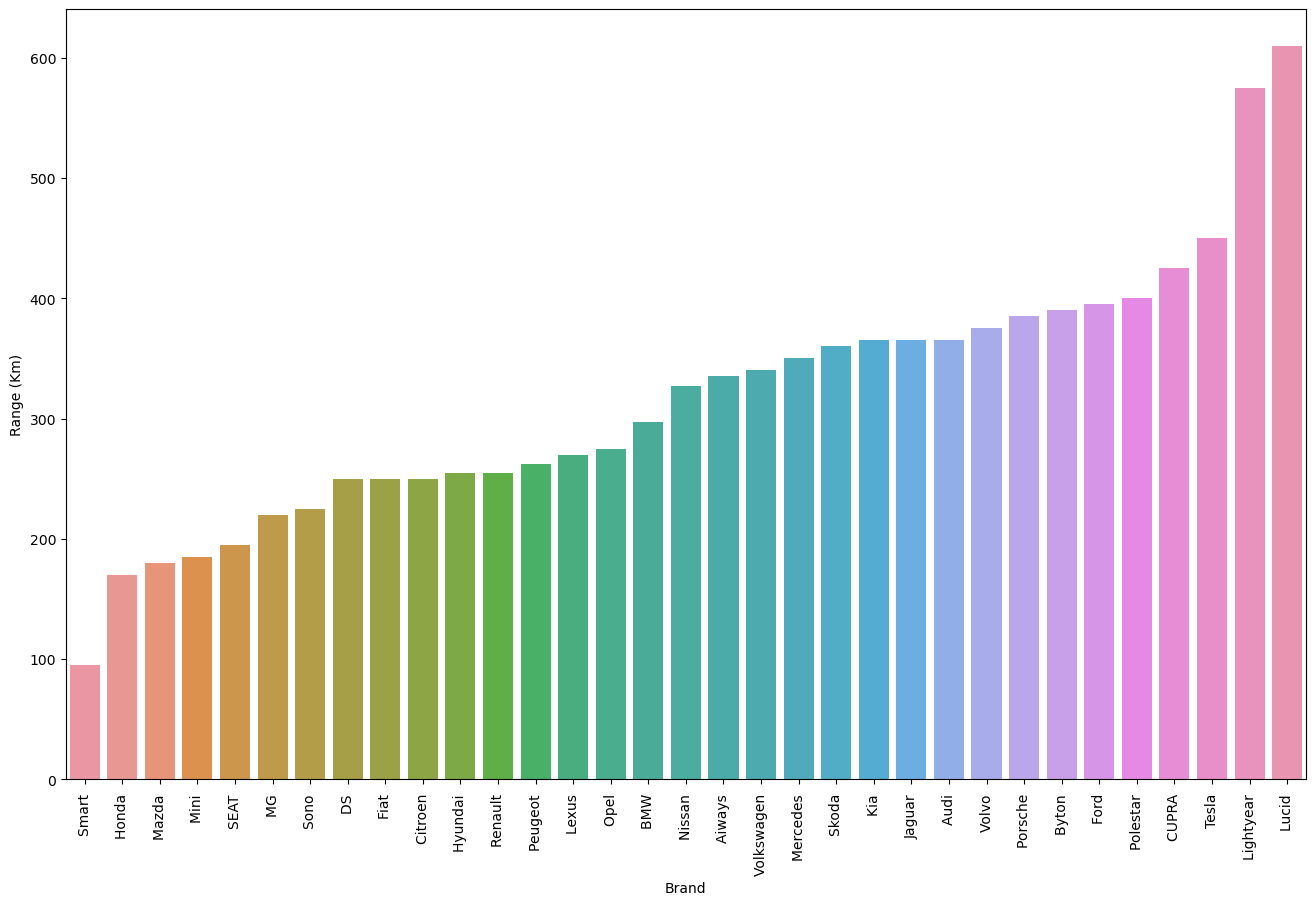

In [137]:
plt.figure(figsize=(16,10))
sns.barplot(data= data_brand_price.sort_values(by='Range (Km)'), x='Brand', y='Range (Km)')
plt.xticks(rotation=90)
plt.show()

# Problem Statement 4

    - What is the relationship between the efficiency (Wh/km) and the range of the electric cars?

In [133]:
data_car

,Brand,Model,acceleration (seconds),TopSpeed (Km/h),Range (Km),Efficiency (Wh/km),FastCharge (km/h),RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233.0,450.0,161.0,940.0,1,All Wheel Drive,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160.0,270.0,167.0,250.0,1,Rear Wheel Drive,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210.0,400.0,181.0,620.0,1,All Wheel Drive,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180.0,360.0,206.0,560.0,1,Rear Wheel Drive,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145.0,170.0,168.0,190.0,1,Rear Wheel Drive,Type 2 CCS,Hatchback,B,4,32997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,Nissan,Ariya 63kWh,7.5,160.0,330.0,191.0,440.0,1,Front Wheel Drive,Type 2 CCS,Hatchback,C,5,45000
99,Audi,e-tron S Sportback 55 quattro,4.5,210.0,335.0,258.0,540.0,1,All Wheel Drive,Type 2 CCS,SUV,E,5,96050
100,Nissan,Ariya e-4ORCE 63kWh,5.9,200.0,325.0,194.0,440.0,1,All Wheel Drive,Type 2 CCS,Hatchback,C,5,50000
101,Nissan,Ariya e-4ORCE 87kWh Performance,5.1,200.0,375.0,232.0,450.0,1,All Wheel Drive,Type 2 CCS,Hatchback,C,5,65000


C:\Users\Akash Tyagi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Akash Tyagi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Efficiency (Wh/km)', ylabel='Range (Km)'>

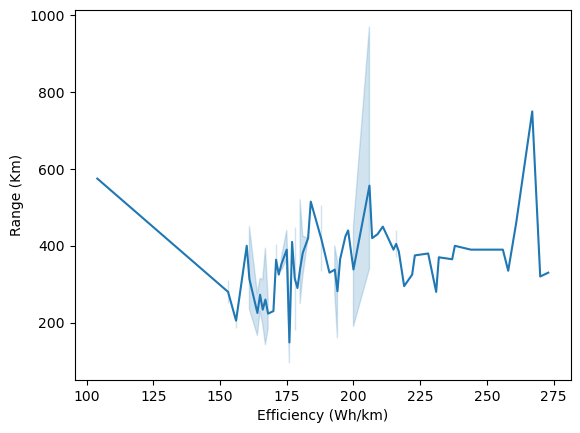

In [141]:
sns.lineplot(data= data_car, x='Efficiency (Wh/km)', y='Range (Km)')

<Axes: xlabel='Efficiency (Wh/km)', ylabel='Range (Km)'>

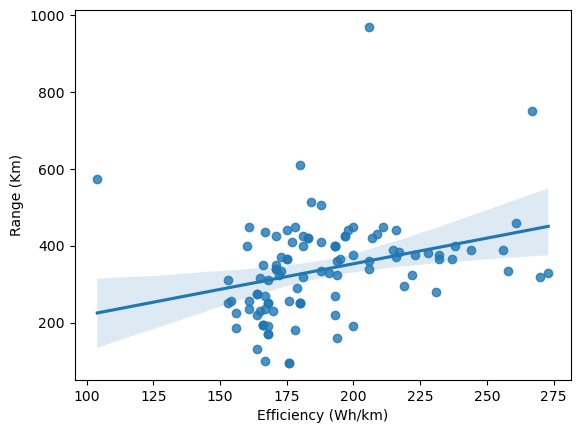

In [151]:
sns.regplot(data= data_car, x='Efficiency (Wh/km)', y='Range (Km)')

# Problem Statement 5

    - How does the price of electric cars relate to their range?

C:\Users\Akash Tyagi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Akash Tyagi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='PriceEuro', ylabel='Range (Km)'>

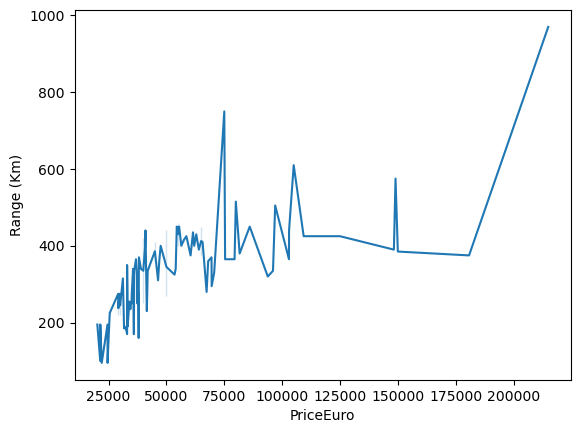

In [145]:
sns.lineplot(data= data_car, x='PriceEuro', y='Range (Km)')

<Axes: xlabel='PriceEuro', ylabel='Range (Km)'>

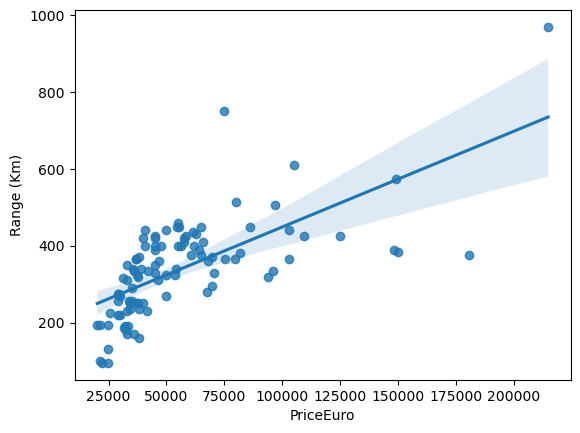

In [150]:
sns.regplot(data= data_car, x='PriceEuro', y='Range (Km)')

# Problem Statement 6 

    - How does the top speed of electric cars vary by body style (e.g., sedan, SUV, hatchback)?

In [154]:
data_car['BodyStyle'].unique()

array(['Sedan', 'Hatchback', 'Liftback', 'SUV', 'Pickup', 'MPV', 'Cabrio',
       'SPV', 'Station'], dtype=object)

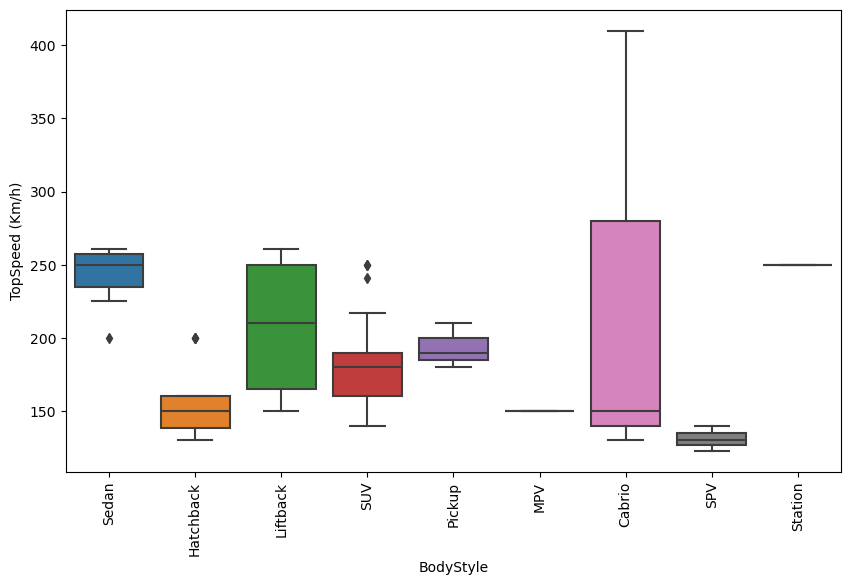

In [160]:
plt.figure(figsize=(10,6))
sns.boxplot(data= data_car, x='BodyStyle', y='TopSpeed (Km/h)')
plt.xticks(rotation=90)
plt.show()

# Problem satement 7

    - How does acceleration performance compare between all-wheel drive and rear-wheel drive electric cars?

In [163]:
data_car['PowerTrain'].unique()

array(['All Wheel Drive', 'Rear Wheel Drive', 'Front Wheel Drive'],
      dtype=object)

In [171]:
data_pt_index = data_car['PowerTrain'][data_car['PowerTrain'].isin(['All Wheel Drive', 'Rear Wheel Drive'])].index

In [172]:
data_car.loc[data_pt_index]

,Brand,Model,acceleration (seconds),TopSpeed (Km/h),Range (Km),Efficiency (Wh/km),FastCharge (km/h),RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233.0,450.0,161.0,940.0,1,All Wheel Drive,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160.0,270.0,167.0,250.0,1,Rear Wheel Drive,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210.0,400.0,181.0,620.0,1,All Wheel Drive,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180.0,360.0,206.0,560.0,1,Rear Wheel Drive,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145.0,170.0,168.0,190.0,1,Rear Wheel Drive,Type 2 CCS,Hatchback,B,4,32997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,Byton,M-Byte 72 kWh 2WD,7.5,190.0,325.0,222.0,420.0,1,Rear Wheel Drive,Type 2 CCS,SUV,E,5,53500
99,Audi,e-tron S Sportback 55 quattro,4.5,210.0,335.0,258.0,540.0,1,All Wheel Drive,Type 2 CCS,SUV,E,5,96050
100,Nissan,Ariya e-4ORCE 63kWh,5.9,200.0,325.0,194.0,440.0,1,All Wheel Drive,Type 2 CCS,Hatchback,C,5,50000
101,Nissan,Ariya e-4ORCE 87kWh Performance,5.1,200.0,375.0,232.0,450.0,1,All Wheel Drive,Type 2 CCS,Hatchback,C,5,65000


<Axes: xlabel='PowerTrain', ylabel='acceleration (seconds)'>

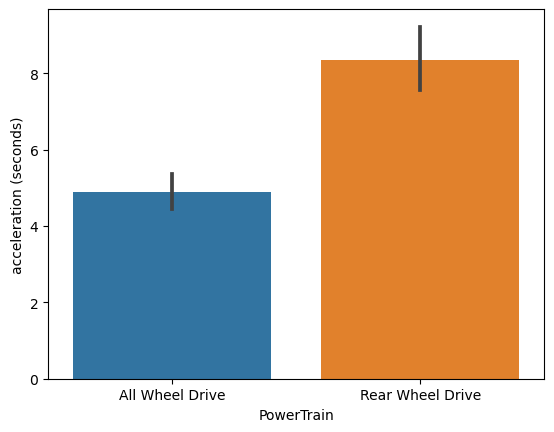

In [174]:
sns.barplot(data=data_car.loc[data_pt_index], x='PowerTrain', y='acceleration (seconds)')

# Problem Statement 8 

    - Is there a correlation between the fast charging speed (km/h) and the range of the electric cars?

<Axes: xlabel='FastCharge (km/h)', ylabel='Range (Km)'>

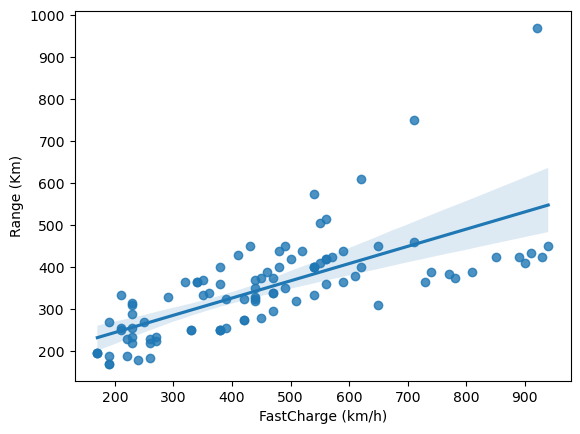

In [38]:
sns.regplot(data= data_car, x='FastCharge (km/h)', y='Range (Km)')

In [47]:
data_car[['FastCharge (km/h)','Range (Km)']].corr()

,FastCharge (km/h),Range (Km)
FastCharge (km/h),1.00000,0.69812
Range (Km),0.69812,1.00000


# Problem Statement 9

    - What is the price distribution of electric cars across different market segments (e.g., B, C, D)?

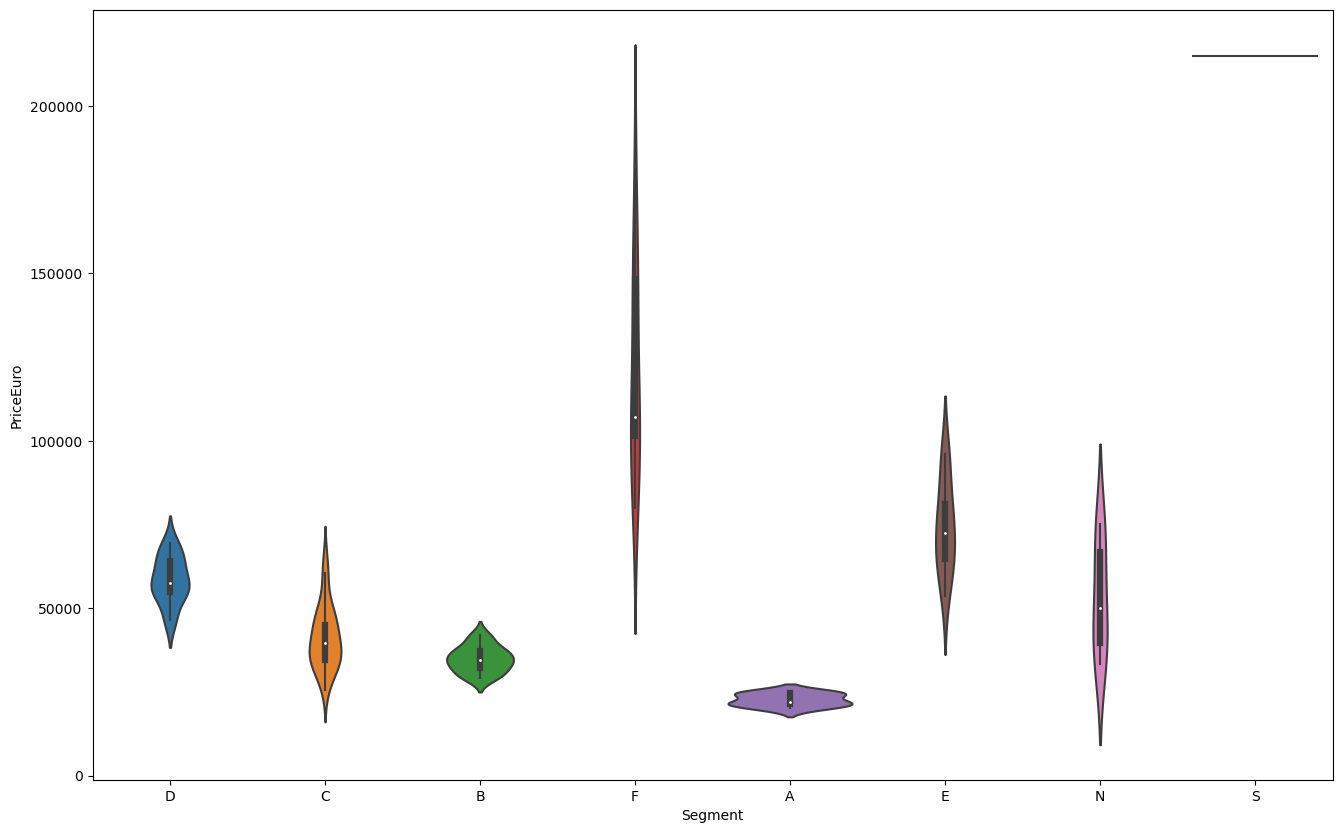

In [53]:
plt.figure(figsize=(16,10))
sns.violinplot(data_car, x='Segment', y='PriceEuro')
plt.show()

# Problem Statement 10 

    - What is the relationship between seating capacity and body style of the electric cars?

In [62]:
bodystyle_seats = data_car.groupby(['BodyStyle'])['Seats'].median().reset_index().sort_values(by='Seats')
bodystyle_seats

,BodyStyle,Seats
0,Cabrio,4.0
8,Station,4.0
7,Sedan,4.5
1,Hatchback,5.0
2,Liftback,5.0
3,MPV,5.0
6,SUV,5.0
4,Pickup,6.0
5,SPV,7.0


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Cabrio'),
  Text(1, 0, 'Station'),
  Text(2, 0, 'Sedan'),
  Text(3, 0, 'Hatchback'),
  Text(4, 0, 'Liftback'),
  Text(5, 0, 'MPV'),
  Text(6, 0, 'SUV'),
  Text(7, 0, 'Pickup'),
  Text(8, 0, 'SPV')])

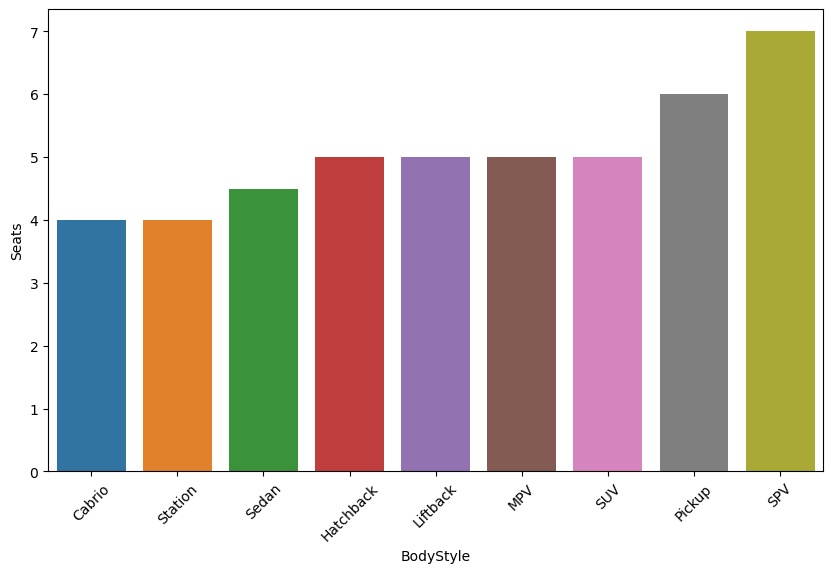

In [64]:
plt.figure(figsize=(10,6))
sns.barplot(bodystyle_seats, x='BodyStyle', y='Seats')
plt.xticks(rotation=45)

In [55]:
data_car

,Brand,Model,acceleration (seconds),TopSpeed (Km/h),Range (Km),Efficiency (Wh/km),FastCharge (km/h),RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233.0,450.0,161.0,940.0,1,All Wheel Drive,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160.0,270.0,167.0,250.0,1,Rear Wheel Drive,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210.0,400.0,181.0,620.0,1,All Wheel Drive,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180.0,360.0,206.0,560.0,1,Rear Wheel Drive,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145.0,170.0,168.0,190.0,1,Rear Wheel Drive,Type 2 CCS,Hatchback,B,4,32997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,Nissan,Ariya 63kWh,7.5,160.0,330.0,191.0,440.0,1,Front Wheel Drive,Type 2 CCS,Hatchback,C,5,45000
99,Audi,e-tron S Sportback 55 quattro,4.5,210.0,335.0,258.0,540.0,1,All Wheel Drive,Type 2 CCS,SUV,E,5,96050
100,Nissan,Ariya e-4ORCE 63kWh,5.9,200.0,325.0,194.0,440.0,1,All Wheel Drive,Type 2 CCS,Hatchback,C,5,50000
101,Nissan,Ariya e-4ORCE 87kWh Performance,5.1,200.0,375.0,232.0,450.0,1,All Wheel Drive,Type 2 CCS,Hatchback,C,5,65000
